In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


# Load training data from CSV
train_df = pd.read_csv("datasets/train_data.csv") # Replace with your own path to train_data.csv

# Load testing data from CSV
test_df = pd.read_csv("datasets/test_data.csv") # Replace with your own path to test_data.csv

# Load images and labels from training data
train_images = []
train_labels = []

for index, row in train_df.iterrows():
    image = Image.open(row['trainSet'])
    grayscale_image = image.convert("L")
    grayscale_array = list(grayscale_image.getdata())
    train_images.append(grayscale_array)
    train_labels.append(row['trainLabel'])

train_images = np.array(train_images)

# Label mapping
d = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6}
train_labels = [d[x] for x in train_labels]

print(train_labels)
# label_encoder = LabelEncoder()
# train_labels = label_encoder.fit_transform(train_labels)

# Load images and labels from testing data
test_images = []
test_labels = []

for index, row in test_df.iterrows():
    image = Image.open(row['testSet'])
    grayscale_image = image.convert("L")
    grayscale_array = list(grayscale_image.getdata())
    test_images.append(grayscale_array)
    test_labels.append(row['testLabel'])

test_images = np.array(test_images)

# Label mapping for test labels
test_labels = [d[x] for x in test_labels]

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
model.fit(train_images, train_labels)

predictions = model.predict(test_images)

# Accuracy
acc = accuracy_score(predictions, test_labels)
print(acc)

# F1 Score
f1 = f1_score(test_labels, predictions, average='weighted') 
print(f1)

KeyboardInterrupt: 

In [42]:
d2 = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'}
df_results = test_df.assign(Prediction=[d2[x] for x in predictions])
print(df_results)

                                                testSet testLabel Prediction
0     datasets/processedDataset/test/angry/PrivateTe...     angry        sad
1     datasets/processedDataset/test/angry/PrivateTe...     angry      angry
2     datasets/processedDataset/test/angry/PrivateTe...     angry      happy
3     datasets/processedDataset/test/angry/PrivateTe...     angry      happy
4     datasets/processedDataset/test/angry/PrivateTe...     angry      angry
...                                                 ...       ...        ...
4957  datasets/processedDataset/test/surprise/Public...  surprise   surprise
4958  datasets/processedDataset/test/surprise/Public...  surprise    neutral
4959  datasets/processedDataset/test/surprise/Public...  surprise    neutral
4960  datasets/processedDataset/test/surprise/Public...  surprise   surprise
4961  datasets/processedDataset/test/surprise/Public...  surprise   surprise

[4962 rows x 3 columns]


In [39]:
from sklearn.metrics import classification_report

print(classification_report(predictions, test_labels, digits=2))

              precision    recall  f1-score   support

           0       0.37      0.29      0.33       823
           1       0.48      0.57      0.52        72
           2       0.31      0.39      0.34       514
           3       0.44      0.52      0.47      1158
           4       0.39      0.38      0.39       958
           5       0.33      0.29      0.31       772
           6       0.64      0.59      0.61       665

    accuracy                           0.42      4962
   macro avg       0.42      0.43      0.43      4962
weighted avg       0.42      0.42      0.41      4962



Actual: Angry     Prediction: Sad


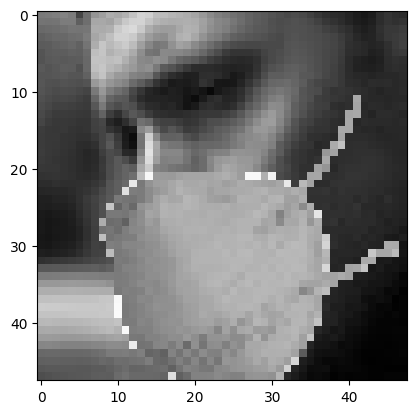

In [52]:
image = Image.open('datasets/processedDataset/test/angry/PrivateTest_1054527_N95.jpg')
grayscale_image = image.convert("L")
# display(grayscale_image)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
print("Actual: Angry     Prediction: Sad")